## Importação da base

In [66]:
import pandas as pd
drug_test = pd.read_csv('Islander_data.csv')
drug_test.head()

,first_name,last_name,age,Happy_Sad_group,Dosage,Drug,Mem_Score_Before,Mem_Score_After,Diff
0,Bastian,Carrasco,25,H,1,A,63.5,61.2,-2.3
1,Evan,Carrasco,52,S,1,A,41.6,40.7,-0.9
2,Florencia,Carrasco,29,H,1,A,59.7,55.1,-4.6
3,Holly,Carrasco,50,S,1,A,51.7,51.2,-0.5
4,Justin,Carrasco,52,H,1,A,47.0,47.1,0.1


In [67]:
# Medidas resumo
drug_test.describe()

,age,Dosage,Mem_Score_Before,Mem_Score_After,Diff
count,198.000000,198.000000,198.000000,198.000000,198.000000
mean,39.530303,1.989899,57.967677,60.922222,2.954545
std,12.023099,0.818504,15.766007,18.133851,10.754603
min,24.000000,1.000000,27.200000,27.100000,-40.400000
25%,30.000000,1.000000,46.525000,47.175000,-3.175000
50%,37.000000,2.000000,54.800000,56.750000,1.700000
75%,48.000000,3.000000,68.400000,73.250000,5.925000
max,83.000000,3.000000,110.000000,120.000000,49.000000


In [68]:
drug_test.shape  # não tem missing

(198, 9)

## Análise exploratória

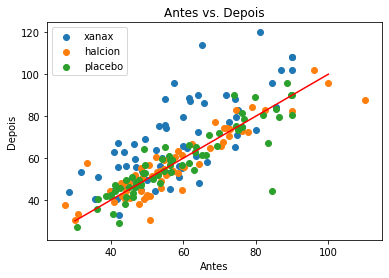

In [69]:
import matplotlib.pyplot as plt

# Análise mem score antes e depois por droga (separo por tipo de droga que a pessoa usa "filtro")
xanax = drug_test[drug_test['Drug'] == 'A']
halcion = drug_test[drug_test['Drug'] == 'T']
placebo = drug_test[drug_test['Drug'] == 'S']

plt.scatter(data= xanax, x = 'Mem_Score_Before', y = 'Mem_Score_After', label='xanax');
plt.scatter(data= halcion, x = 'Mem_Score_Before', y = 'Mem_Score_After', label = 'halcion');
plt.scatter(data= placebo, x = 'Mem_Score_Before', y = 'Mem_Score_After', label = 'placebo');

plt.legend(); 
plt.title('Antes vs. Depois');
plt.xlabel('Antes');
plt.ylabel('Depois');

# somente uma reta para auxiliar a visualização
x = [30.0,100.0]
plt.plot(x, x, color='red'); # y = x

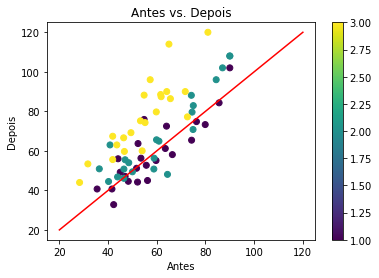

In [70]:
# xanax dosagem vs. score de memória
plt.scatter(data= xanax, x = 'Mem_Score_Before', y = 'Mem_Score_After', c='Dosage');

#se eu quiser ver outra drga, ou o placebo, só modar o campo data

plt.colorbar() # c é numerico, por isso colorbar e não legend
plt.title('Antes vs. Depois');
plt.xlabel('Antes');
plt.ylabel('Depois');

x = [20.0,120.0]
plt.plot(x, x, color='red'); # y = x

Podemos observar que a dosagem faz diferença, no caso xanax. A dosagem de 3, de acordo com a base de dados, foi a que apresentou os melhores resultados.

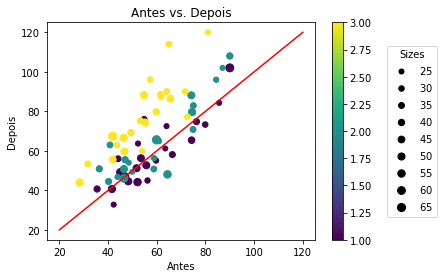

In [71]:
# xanax dosagem vs. score de memória: tamanho dos pontos por idade
fig = plt.scatter(data= xanax, x = 'Mem_Score_Before', y = 'Mem_Score_After', c='Dosage', s='age');

#se eu quiser ver outra drga, ou o placebo, só modar o campo data

plt.colorbar() # c é numerico, por isso colorbar e não legend
handles, labels = fig.legend_elements(prop="sizes")
plt.legend(handles, labels, loc='center left', title="Sizes", bbox_to_anchor=(1.25, 0.5))

plt.title('Antes vs. Depois');
plt.xlabel('Antes');
plt.ylabel('Depois');

x = [20.0,120.0]
plt.plot(x, x, color='red'); # y = x

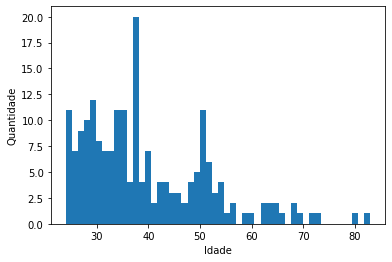

In [72]:
# Histograma: idade
plt.hist(drug_test['age'], bins=50);

plt.xlabel('Idade');
plt.ylabel('Quantidade');

Podemos verificar que a quantidade é bem menor em pacientes idosos.

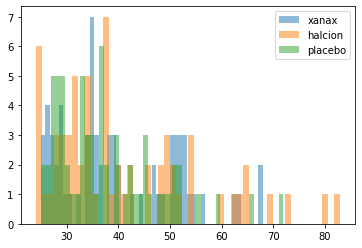

In [73]:
# Histograma: idade por droga
plt.hist(xanax['age'], bins=50, alpha =0.5, label='xanax');
plt.hist(halcion['age'], bins=50, alpha =0.5, label='halcion');
plt.hist(placebo['age'], bins=50, alpha =0.5, label='placebo');
plt.legend();

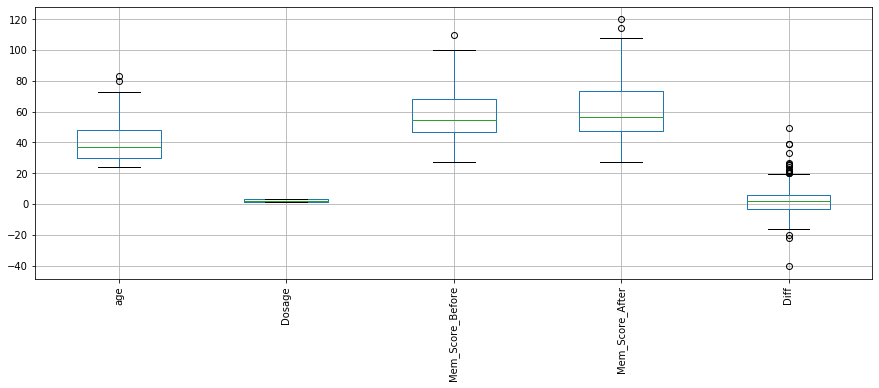

In [74]:
# Boxplot por atributo
drug_test.boxplot(figsize=(15,5));
plt.xticks(rotation=90);

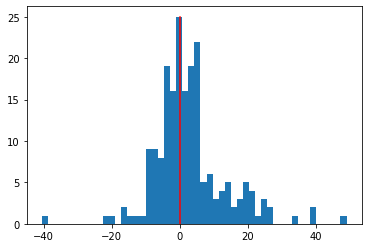

In [75]:
# diff: diferença entre o score de memória antes e depois ==> After - Before
plt.hist(drug_test['Diff'], bins=50);

#somente para facilitar a divisão e a visualização
x = [0, 0]
y = [0, 25]
plt.plot(x,y, color='red');

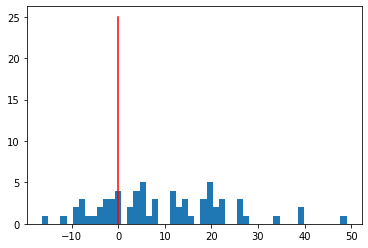

In [76]:
# diff: diferença entre o score de memória antes e depois ==> After - Before
plt.hist(xanax['Diff'], bins=50); 
#para ver de outras drogas, só mudar o nome

#somente para facilitar a divisão e a visualização
x = [0, 0]
y = [0, 25]
plt.plot(x,y, color='red');

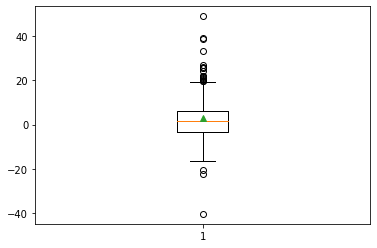

In [77]:
# Boxplot Diff
plt.boxplot(drug_test['Diff'], showmeans=True);
# o triângulo é a média

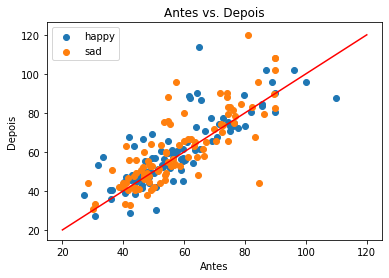

In [78]:
# score de memória antes e depois por tipo de memória
#filtro
happy = drug_test[drug_test['Happy_Sad_group'] == 'H']
sad = drug_test[drug_test['Happy_Sad_group'] == 'S']

plt.scatter(data= happy, x = 'Mem_Score_Before', y = 'Mem_Score_After', label='happy');
plt.scatter(data= sad, x = 'Mem_Score_Before', y = 'Mem_Score_After', label='sad');
plt.legend();

plt.title('Antes vs. Depois');
plt.xlabel('Antes');
plt.ylabel('Depois');

x = [20.0,120.0]
plt.plot(x, x, color='red'); # y = x

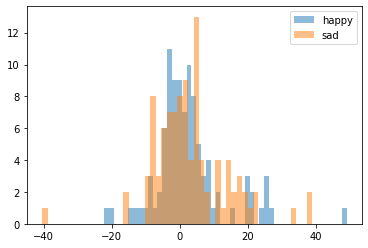

In [79]:
# Histograma de Diferença de score para memórias felizes e tristes
plt.hist(happy['Diff'], bins=50, alpha =0.5, label='happy');
plt.hist(sad['Diff'], bins=50, alpha =0.5, label='sad');

plt.legend(['happy', 'sad']);

Não parece ter influência a condição, se houver é muito sutil.

# Machine Learning: Queremos prever o memory score after

## vamos retirar o nome da base e colocar como id de linha

In [80]:
df = drug_test
names = df.first_name + ' ' + df.last_name
df.index = names
df.head()

,first_name,last_name,age,Happy_Sad_group,Dosage,Drug,Mem_Score_Before,Mem_Score_After,Diff
Bastian Carrasco,Bastian,Carrasco,25,H,1,A,63.5,61.2,-2.3
Evan Carrasco,Evan,Carrasco,52,S,1,A,41.6,40.7,-0.9
Florencia Carrasco,Florencia,Carrasco,29,H,1,A,59.7,55.1,-4.6
Holly Carrasco,Holly,Carrasco,50,S,1,A,51.7,51.2,-0.5
Justin Carrasco,Justin,Carrasco,52,H,1,A,47.0,47.1,0.1


In [81]:
del df['first_name']  # deletando o nome
del df['last_name']   # deletando o sobrenome
df.head()

,age,Happy_Sad_group,Dosage,Drug,Mem_Score_Before,Mem_Score_After,Diff
Bastian Carrasco,25,H,1,A,63.5,61.2,-2.3
Evan Carrasco,52,S,1,A,41.6,40.7,-0.9
Florencia Carrasco,29,H,1,A,59.7,55.1,-4.6
Holly Carrasco,50,S,1,A,51.7,51.2,-0.5
Justin Carrasco,52,H,1,A,47.0,47.1,0.1


In [82]:
del df['Diff'] # Temos que remover tb a coluna Diff (a diff não existirá em uma "previsão")
df.head()

,age,Happy_Sad_group,Dosage,Drug,Mem_Score_Before,Mem_Score_After
Bastian Carrasco,25,H,1,A,63.5,61.2
Evan Carrasco,52,S,1,A,41.6,40.7
Florencia Carrasco,29,H,1,A,59.7,55.1
Holly Carrasco,50,S,1,A,51.7,51.2
Justin Carrasco,52,H,1,A,47.0,47.1


## Converter atributos categóricos em numéricos

In [83]:
df.Happy_Sad_group.value_counts()

H    99
S    99
Name: Happy_Sad_group, dtype: int64

In [84]:
df.Drug.value_counts()

A    67
S    66
T    65
Name: Drug, dtype: int64

In [85]:
# OneHotEncoding
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder(drop='first') # deleta um atributo, evitando a multicolinearidade
one_hot = pd.DataFrame(onehotencoder.fit_transform(df[['Happy_Sad_group', 'Drug']]).toarray())
one_hot.head()

,0,1,2
0,0.0,0.0,0.0
1,1.0,0.0,0.0
2,0.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,0.0


In [86]:
df = pd.concat([one_hot.reset_index(drop=True), df.reset_index(drop=True)], axis=1)
df.index = names
df.head()

,0,1,2,age,Happy_Sad_group,Dosage,Drug,Mem_Score_Before,Mem_Score_After
Bastian Carrasco,0.0,0.0,0.0,25,H,1,A,63.5,61.2
Evan Carrasco,1.0,0.0,0.0,52,S,1,A,41.6,40.7
Florencia Carrasco,0.0,0.0,0.0,29,H,1,A,59.7,55.1
Holly Carrasco,1.0,0.0,0.0,50,S,1,A,51.7,51.2
Justin Carrasco,0.0,0.0,0.0,52,H,1,A,47.0,47.1


In [87]:
del df['Happy_Sad_group']
del df['Drug']
df.head()

,0,1,2,age,Dosage,Mem_Score_Before,Mem_Score_After
Bastian Carrasco,0.0,0.0,0.0,25,1,63.5,61.2
Evan Carrasco,1.0,0.0,0.0,52,1,41.6,40.7
Florencia Carrasco,0.0,0.0,0.0,29,1,59.7,55.1
Holly Carrasco,1.0,0.0,0.0,50,1,51.7,51.2
Justin Carrasco,0.0,0.0,0.0,52,1,47.0,47.1


In [88]:
df.dtypes

0                   float64
1                   float64
2                   float64
age                   int64
Dosage                int64
Mem_Score_Before    float64
Mem_Score_After     float64
dtype: object

## Separar bases de treino e teste

In [89]:
# semente para reprodução de resultados
seed=10000

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.loc[:,df.columns != 'Mem_Score_After'], df['Mem_Score_After'], test_size=0.2, random_state=seed)

print('shape input de treino: ', X_train.shape)
print('shape input de teste: ', X_test.shape)
print('shape output de treino: ', y_train.shape)
print('shape output de teste: ', y_test.shape)

shape input de treino:  (158, 6)
shape input de teste:  (40, 6)
shape output de treino:  (158,)
shape output de teste:  (40,)


## Árvore de Decisão

In [90]:
# treinar modelo
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(min_samples_leaf=5, random_state=seed)  #PODEMOS TESTAR VÁRIOS PARÂMETROS
model.fit(X_train, y_train);

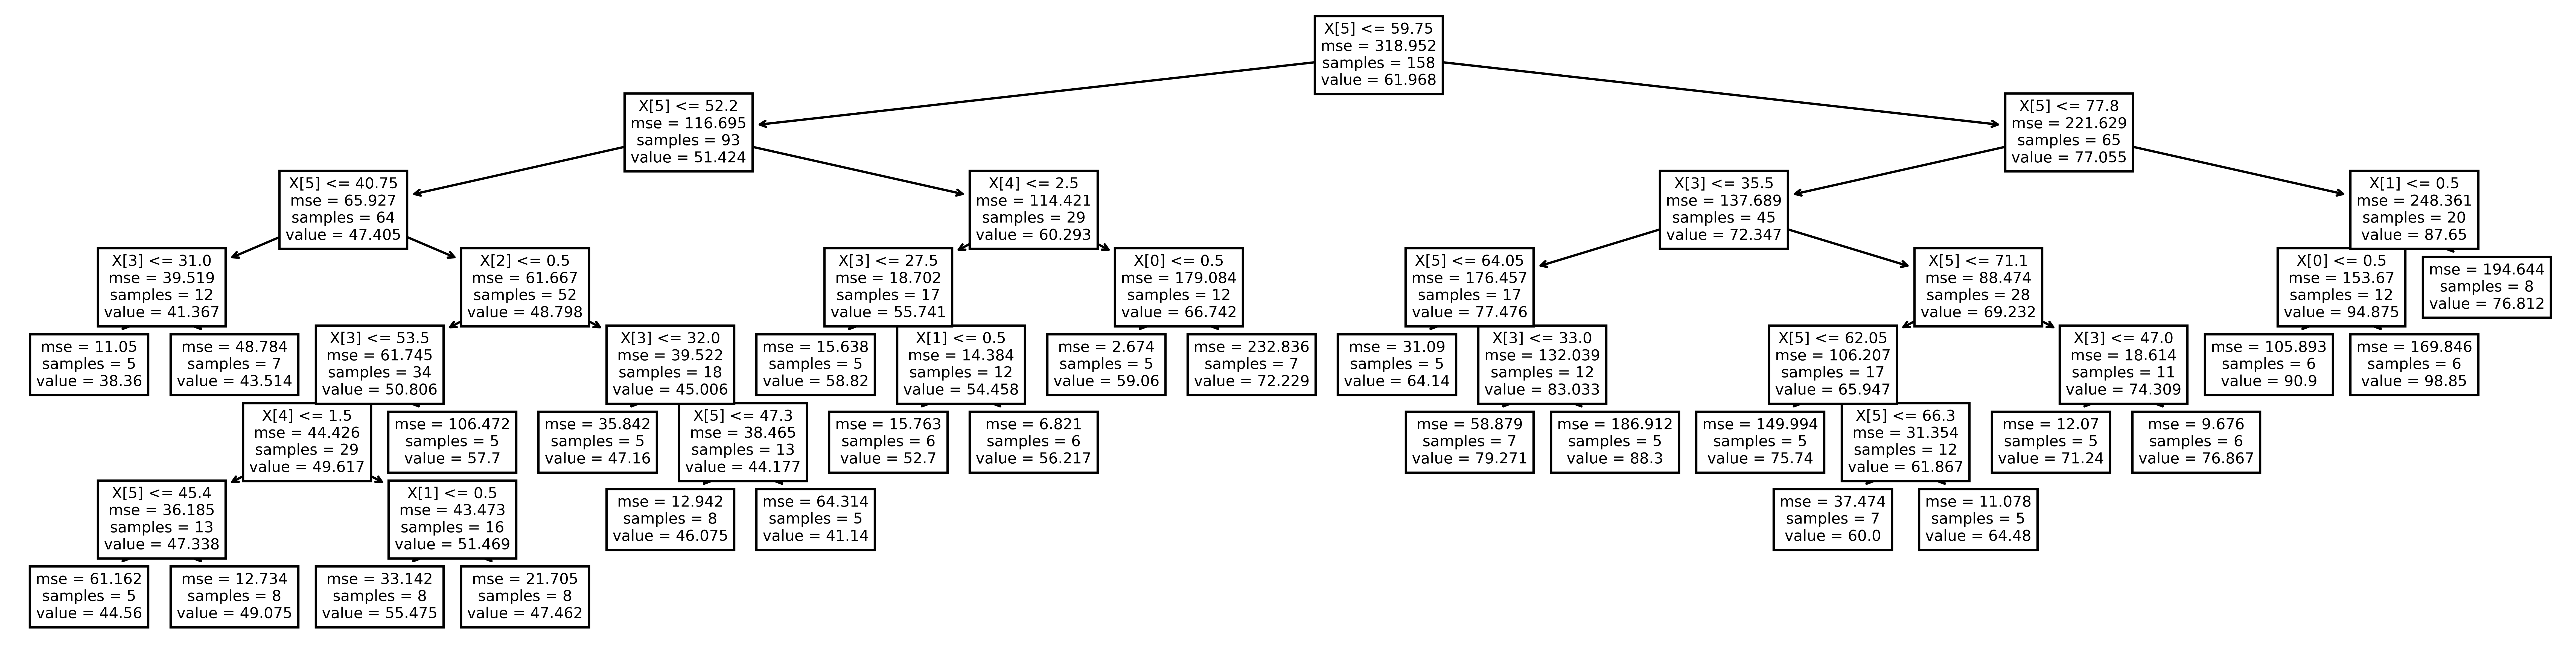

In [107]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,5), dpi=600)
plot_tree(model);

In [101]:
# Visualização gráfica da árvore de decisão  LOCAL TEM DE INSTALAR O GRAPHVIZ
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

#dot_data = export_graphviz(model, out_file=None, feature_names=list(pd.DataFrame(X_train).columns.values), 
#                           class_names=['Abnormal', 'Normal'], rounded=True, filled=True)
#graph = pydotplus.graph_from_dot_data(dot_data)
#Image(graph.create_png())

In [102]:
# Avaliar modelo treinado
model.score(X_test, y_test) # R2

0.6784886234024815

In [103]:
y_pred = model.predict(X_test) #inferência do teste

In [104]:
# Métrica MAPE (%)
import numpy as np
np.mean(np.abs((y_test - y_pred) / y_test)) * 100

14.267828119786335

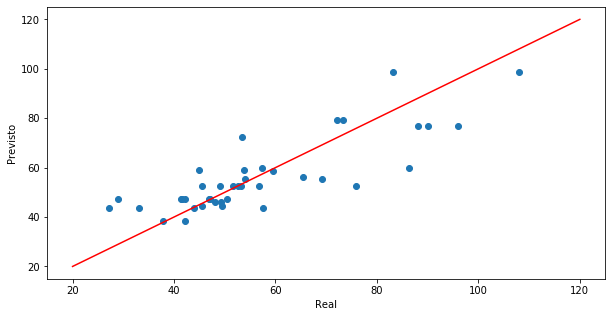

In [106]:
plt.figure(figsize=(10,5))
plt.scatter(y_test, y_pred)
plt.xlabel('Real')
plt.ylabel('Previsto')

x = [20.0,120.0]
plt.plot(x, x, color='red'); # y = x

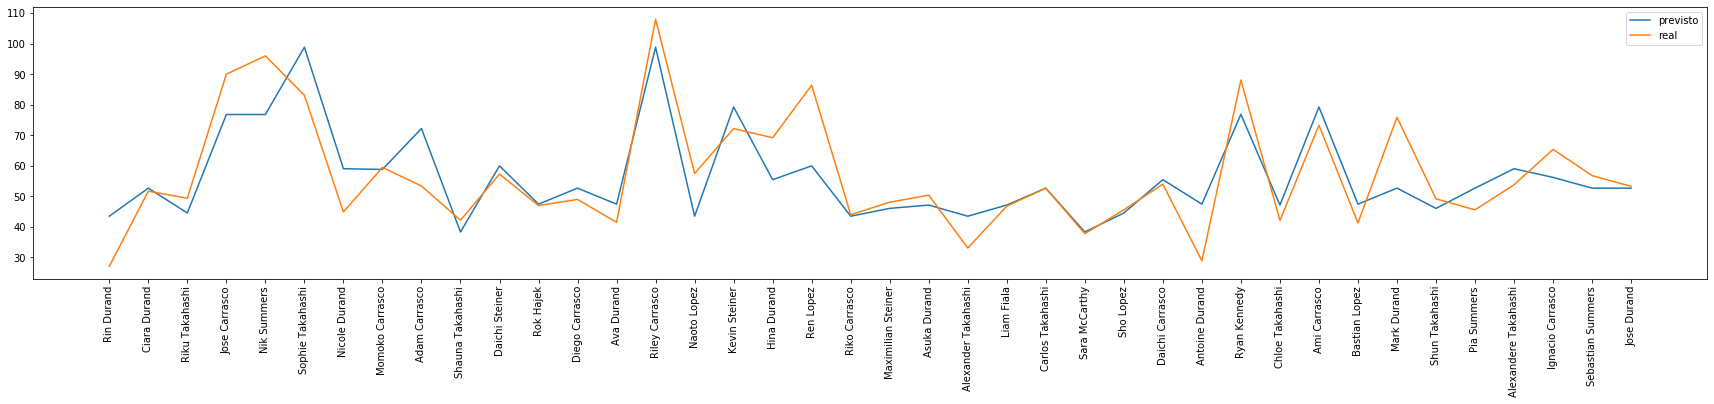

In [108]:
plt.figure(figsize=(30,5))
plt.plot(y_pred, label='previsto');
plt.plot(y_test, label='real');
plt.legend();
plt.xticks(rotation=90);

# Random Forest

In [119]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(500, max_features=6, random_state=seed);
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=6, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=10000, verbose=0, warm_start=False)

In [120]:
# Métrica R2
rf.score(X_test, y_test)

0.7690283328898897

In [121]:
y_pred_rf = rf.predict(X_test) #inferência do teste

In [122]:
# Métrica MAPE (%)
import numpy as np
np.mean(np.abs((y_test - y_pred_rf) / y_test)) * 100

14.46680705793256

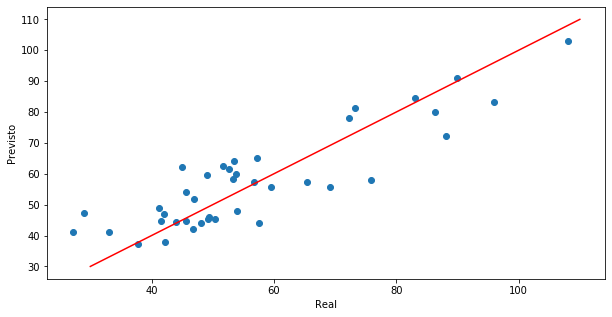

In [123]:
plt.figure(figsize=(10,5))
plt.scatter(y_test, y_pred_rf)
plt.xlabel('Real')
plt.ylabel('Previsto')

x = [30.0,110.0]
plt.plot(x, x, color='red'); # y = x

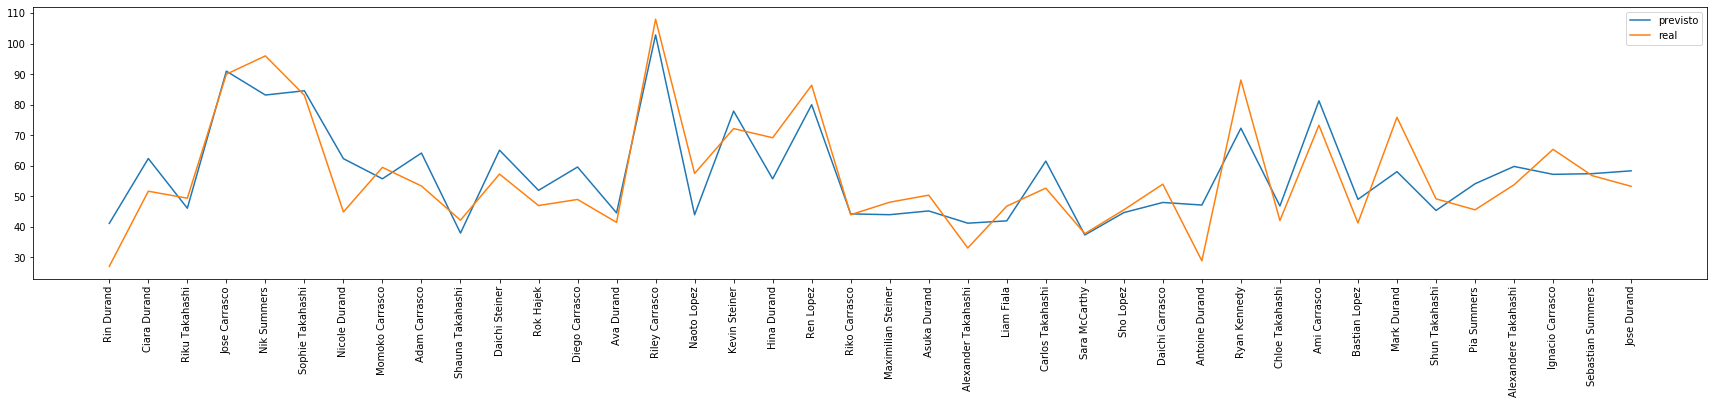

In [124]:
plt.figure(figsize=(30,5))
plt.plot(y_pred_rf, label='previsto');
plt.plot(y_test, label='real');
plt.legend();
plt.xticks(rotation=90);